In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Python   Machine Learning/Machine Learning Models/Titanic - Machine Learning from Disaster/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Python   Machine Learning/Machine Learning Models/Titanic - Machine Learning from Disaster/test.csv")

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
print("Train Shape : ", train.shape)

Train Shape :  (891, 12)


In [6]:
print("Test Shape : ", test.shape)

Test Shape :  (418, 11)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h1>Data Dictionary</h1>
<ul>
<li>Survived: 0 = No, 1 = Yes</li>
<li>pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd</li>
<li>sibsp: # of siblings / spouses aboard the Titanic</li>
<li>parch: # of parents / children aboard the Titanic</li>
<li>ticket: Ticket number</li>
<li>cabin: Cabin number</li>
<li>embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton</li>
</ul>

In [9]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
test["Survived"] = ""
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


<h1>Data Visualization using Matplotlib and Seaborn packages.</h1>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def bar_chat(feature):
  survived = train[train["Survived"]==0][feature].value_counts()
  dead = train[train["Survived"]==1][feature].value_counts()
  df = pd.DataFrame([survived,dead], index= ["Survived","Dead"])
  df.plot(kind= 'bar', stacked= True, figsize = (11, 5))

Survived: 
 male      468
female     81
Name: Sex, dtype: int64
Dead: 
 female    233
male      109
Name: Sex, dtype: int64


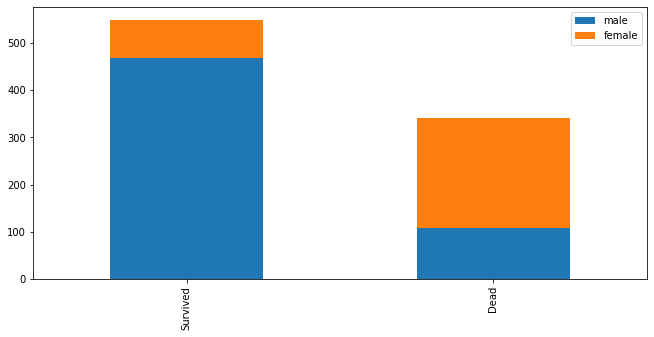

In [16]:
bar_chat("Sex")
print("Survived: \n", train[train["Survived"]==0]["Sex"].value_counts())
print("Dead: \n",train[train["Survived"]==1]["Sex"].value_counts())

**The Chart confirms Women more likely survivied than Men.**

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


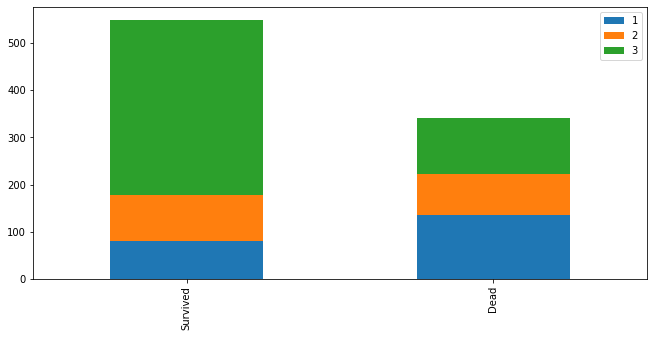

In [17]:
bar_chat("Pclass")
print("Survived :\n",train[train['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Pclass'].value_counts())

**The Chart confirms 1st class more likely survivied than other classes.**
<br>
**The Chart confirms 3rd class more likely dead than other classes**

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


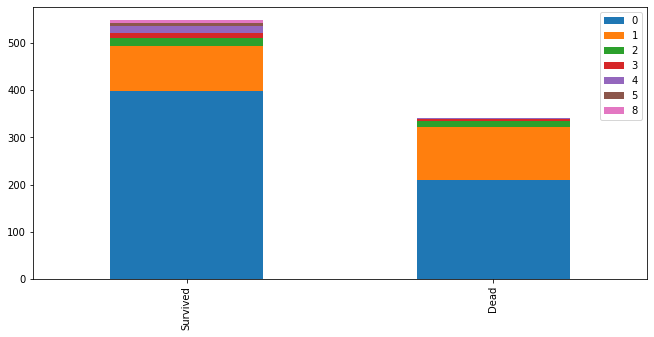

In [18]:
bar_chat("SibSp")
print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

**The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.**
<br>
**The Chart confirms a person aboarded without siblings or spouse more likely dead**

Survied :  0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64
Dead :  0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


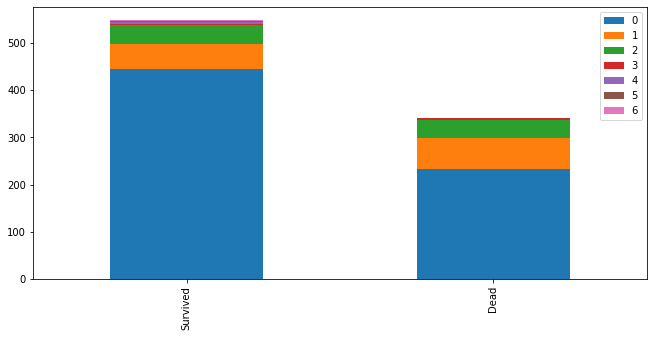

In [19]:
bar_chat("Parch")
print("Survied : ", train[train["Survived"]==0]["Parch"].value_counts())
print("Dead : ", train[train["Survived"]==1]["Parch"].value_counts())

**The Chart confirms a person aboarded with more than 2 parents or children more likely survived.**
<br>
**The Chart confirms a person aboarded alone more likely dead**

Survived :  S    427
C     75
Q     47
Name: Embarked, dtype: int64
Dead : S    217
C     93
Q     30
Name: Embarked, dtype: int64


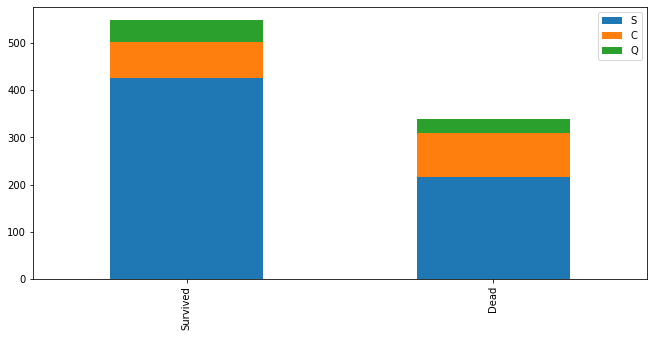

In [20]:
bar_chat("Embarked")
print("Survived : ", train[train["Survived"]==0]["Embarked"].value_counts())
print("Dead :", train[train["Survived"]==1]["Embarked"].value_counts())

**The Chart confirms a person aboarded from C slightly more likely survived.**
<br>
**The Chart confirms a person aboarded from Q more likely dead.**
<br>
**The Chart confirms a person aboarded from S more likely dead.**

<h1>Feature Engineering</h1>

In [21]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
dataset = [train,test] #Combine dataset

for df in dataset:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [23]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,Mrs


In [24]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Sir           1
Don           1
Mme           1
Countess      1
Jonkheer      1
Ms            1
Capt          1
Name: Title, dtype: int64

In [25]:
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

<h1>Title Map</h1>
<ul>
<li>Mr : 0
<li>Miss : 1
<li>Mrs: 2
<li>Others: 3

In [26]:
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, "Dr": 3, "Rev": 3,
                 "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3, "Ms": 3, 
                 "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,
                 "Capt": 3,"Sir": 3 }

for df in dataset:
  df["Title"] = df["Title"].map(title_mapping)

In [27]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.710438
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.968778
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [28]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [29]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.732057
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.972019
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [30]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,,0


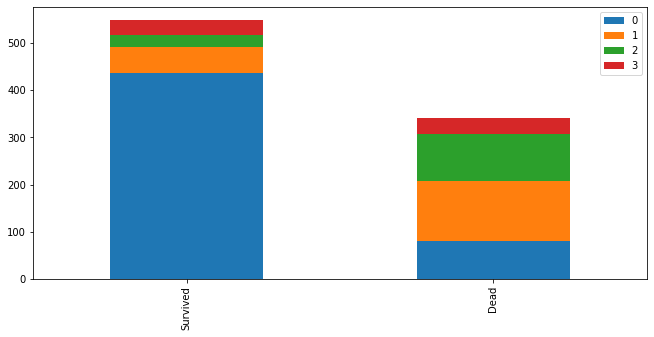

In [31]:
bar_chat("Title")

In [32]:
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis= 1, inplace=True)

In [33]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0


In [34]:
sex_mappling = {"male": 1, "female":0}

for df in dataset:
  df["Sex"] = df["Sex"].map(sex_mappling)

In [35]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C,0


In [36]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,A.5. 3236,8.0500,NaN,S,,0
414,1306,1,0,39.0,0,0,PC 17758,108.9000,C105,C,,3
415,1307,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,,0
416,1308,3,1,NaN,0,0,359309,8.0500,NaN,S,,0


In [37]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [38]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,,2
5,897,3,1,14.0,0,0,7538,9.2250,NaN,S,,0
6,898,3,0,30.0,0,0,330972,7.6292,NaN,Q,,1
7,899,2,1,26.0,1,1,248738,29.0000,NaN,S,,0
8,900,3,0,18.0,0,0,2657,7.2292,NaN,C,,2
9,901,3,1,21.0,2,0,A/4 48871,24.1500,NaN,S,,0


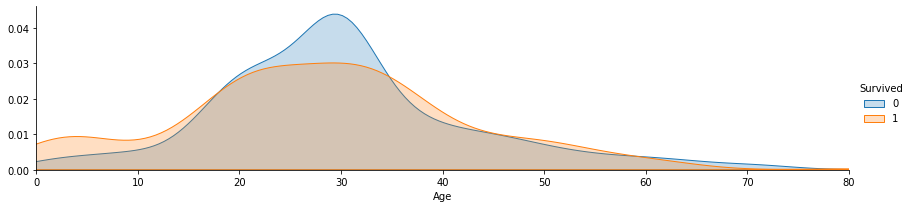

(10.0, 50.0)

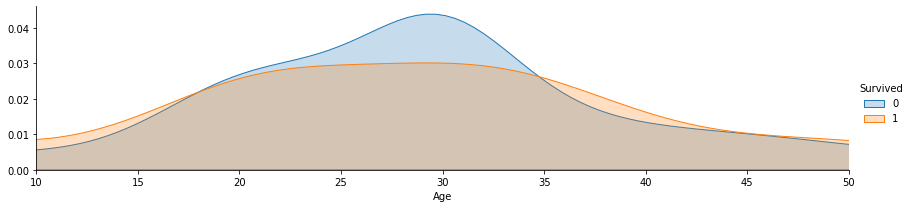

In [39]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Survived     418 non-null    object 
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [42]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,0,21.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C,0


In [43]:
for df in dataset:
  df.loc[(df['Age'] <= 16), 'Age'] = 0
  df.loc[(df['Age'] > 16) & (df['Age'] <= 26), 'Age'] = 1
  df.loc[(df['Age'] > 26) & (df['Age'] <= 36), 'Age'] = 2
  df.loc[(df['Age'] > 36) & (df['Age'] <= 62), 'Age'] = 3
  df.loc[ df['Age'] > 62, 'Age'] = 4

In [44]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,0,1.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,0,1.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,1,1.0,0,0,111369,30.0000,C148,C,0


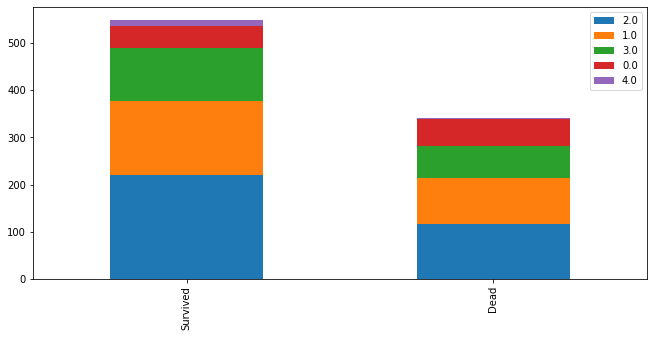

In [45]:
bar_chat("Age")

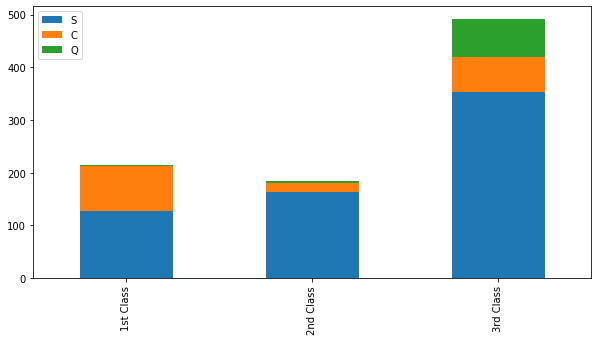

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [46]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [48]:
for df in dataset:
    df['Embarked'] =  df['Embarked'].fillna('S')

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [50]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for df in dataset:
    df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [51]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,1,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,1,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,1,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,0,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,0,0.0,1,0,237736,30.0708,NaN,1,2


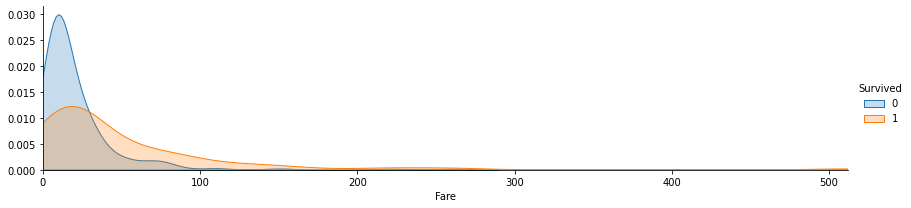

In [52]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

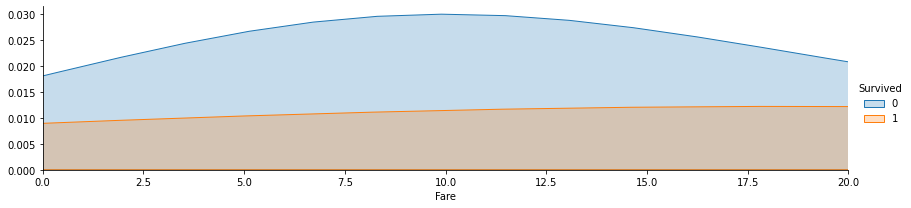

In [53]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [54]:
for df in dataset:
    df.loc[df['Fare'] <= 17, 'Fare'] = 0
    df.loc[(df['Fare'] > 17) & (df['Fare'] <= 30), 'Fare'] = 1
    df.loc[(df['Fare'] > 30) & (df['Fare'] <= 100), 'Fare'] = 2
    df.loc[df['Fare'] >= 100, 'Fare'] = 3

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,0,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,1,2.0,0,0,373450,0.0,NaN,0,0


In [56]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F2             3
              ..
C104           1
B94            1
E10            1
A24            1
C70            1
Name: Cabin, Length: 147, dtype: int64

In [57]:
for df in dataset:
    df['Cabin'] =  df['Cabin'].str[:1]

In [58]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,0,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,1,2.0,0,0,373450,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2.0,0,0,211536,0.0,NaN,0,3
887,888,1,1,0,1.0,0,0,112053,1.0,B,0,1
888,889,0,3,0,1.0,1,2,W./C. 6607,1.0,NaN,0,1
889,890,1,1,1,1.0,0,0,111369,1.0,C,1,0


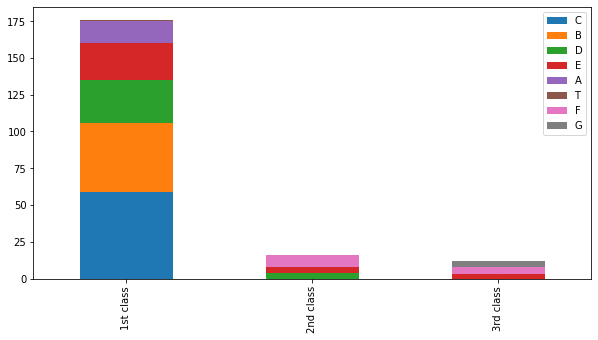

In [59]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [60]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for df in dataset:
    df['Cabin'] = df['Cabin'].map(cabin_mapping)

In [61]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [62]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [63]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2.0,0,0,211536,0.0,1.8,0,3,1
887,888,1,1,0,1.0,0,0,112053,1.0,0.4,0,1,1
888,889,0,3,0,1.0,1,2,W./C. 6607,1.0,2.0,0,1,4
889,890,1,1,1,1.0,0,0,111369,1.0,0.8,1,0,1


In [64]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,1,2.0,0,0,330911,0.0,2.0,2,,0,1
1,893,3,0,3.0,1,0,363272,0.0,2.0,0,,2,2
2,894,2,1,3.0,0,0,240276,0.0,2.0,2,,0,1
3,895,3,1,2.0,0,0,315154,0.0,2.0,0,,0,1
4,896,3,0,1.0,1,1,3101298,0.0,2.0,0,,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,2.0,0,0,A.5. 3236,0.0,2.0,0,,0,1
414,1306,1,0,3.0,0,0,PC 17758,3.0,0.8,1,,3,1
415,1307,3,1,3.0,0,0,SOTON/O.Q. 3101262,0.0,2.0,0,,0,1
416,1308,3,1,2.0,0,0,359309,0.0,2.0,0,,0,1


(0.0, 11.0)

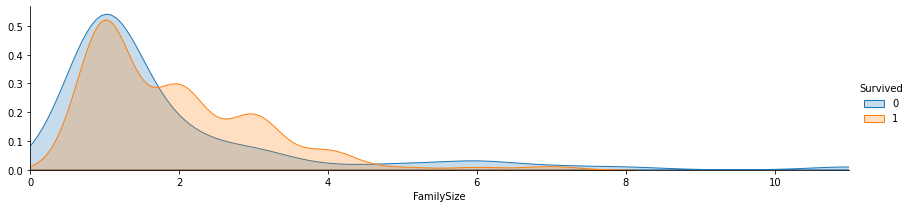

In [65]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [66]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for df in dataset:
    df['FamilySize'] = df['FamilySize'].map(family_mapping)

In [67]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2.0,0,0,211536,0.0,1.8,0,3,0.0
887,888,1,1,0,1.0,0,0,112053,1.0,0.4,0,1,0.0
888,889,0,3,0,1.0,1,2,W./C. 6607,1.0,2.0,0,1,1.2
889,890,1,1,1,1.0,0,0,111369,1.0,0.8,1,0,0.0


In [68]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,1,2.0,0,0,330911,0.0,2.0,2,,0,0.0
1,893,3,0,3.0,1,0,363272,0.0,2.0,0,,2,0.4
2,894,2,1,3.0,0,0,240276,0.0,2.0,2,,0,0.0
3,895,3,1,2.0,0,0,315154,0.0,2.0,0,,0,0.0
4,896,3,0,1.0,1,1,3101298,0.0,2.0,0,,2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,2.0,0,0,A.5. 3236,0.0,2.0,0,,0,0.0
414,1306,1,0,3.0,0,0,PC 17758,3.0,0.8,1,,3,0.0
415,1307,3,1,3.0,0,0,SOTON/O.Q. 3101262,0.0,2.0,0,,0,0.0
416,1308,3,1,2.0,0,0,359309,0.0,2.0,0,,0,0.0


In [69]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)

In [70]:
train = train.drop(['PassengerId'], axis=1)

In [71]:
test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,1,2.0,0.0,2.0,2,,0,0.0
1,893,3,0,3.0,0.0,2.0,0,,2,0.4
2,894,2,1,3.0,0.0,2.0,2,,0,0.0
3,895,3,1,2.0,0.0,2.0,0,,0,0.0
4,896,3,0,1.0,0.0,2.0,0,,2,0.8
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,2.0,0.0,2.0,0,,0,0.0
414,1306,1,0,3.0,3.0,0.8,1,,3,0.0
415,1307,3,1,3.0,0.0,2.0,0,,0,0.0
416,1308,3,1,2.0,0.0,2.0,0,,0,0.0


In [72]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [73]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,1,1.0,0.0,2.0,0,0,0.4
1,1,0,3.0,2.0,0.8,1,2,0.4
2,3,0,1.0,0.0,2.0,0,1,0.0
3,1,0,2.0,2.0,0.8,0,2,0.4
4,3,1,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,2,1,2.0,0.0,1.8,0,3,0.0
887,1,0,1.0,1.0,0.4,0,1,0.0
888,3,0,1.0,1.0,2.0,0,1,1.2
889,1,1,1.0,1.0,0.8,1,0,0.0


In [74]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [75]:
test.drop(['Survived'], axis=1, inplace=True)

In [76]:
target_test = test["PassengerId"]

In [77]:
target_test

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [78]:
test.drop('PassengerId', axis=1, inplace=True)

In [79]:
target_test = pd.DataFrame(target_test, columns=['PassengerId'])

In [80]:
target_test

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


**Reference Predictions**

In [81]:
ref = pd.read_csv("/content/drive/MyDrive/Python   Machine Learning/Machine Learning Models/Titanic - Machine Learning from Disaster/ref.csv")

In [82]:
ref

,Unnamed: 0,PassengerId,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,Survived
0,0,892,0,2,0,2.0,2,0,0.0,0
1,1,893,1,3,0,2.0,0,2,0.4,1
2,2,894,0,3,0,2.0,2,0,0.0,0
3,3,895,0,2,0,2.0,0,0,0.0,0
4,4,896,1,1,0,2.0,0,2,0.8,1
...,...,...,...,...,...,...,...,...,...,...
413,413,1305,0,2,0,2.0,0,0,0.0,0
414,414,1306,1,3,3,0.8,1,3,0.0,1
415,415,1307,0,3,0,2.0,0,0,0.0,0
416,416,1308,0,2,0,2.0,0,0,0.0,0


In [83]:
ref.drop(['Unnamed: 0','Sex','Age','Fare','Cabin','Embarked','Title','FamilySize'], axis=1, inplace=True)

In [84]:
ref

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<h1>Modelling</h1>

**Logistic Regression**

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [86]:
regression = LogisticRegression(random_state=0)
regression.fit(train_data,target)

test_predict = regression.predict(test)

cm = confusion_matrix(ref['Survived'], test_predict)
print("Confusion Matrix",cm)

cm_accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Confusion Matrix Accuracy",cm_accuracy)

acc = accuracy_score(ref['Survived'], test_predict)
print("Accuracy Score ", acc)

Confusion Matrix [[249   8]
 [ 14 147]]
Confusion Matrix Accuracy 0.9473684210526315
Accuracy Score  0.9473684210526315


**K-NN**

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
classifier = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p=2)
classifier.fit(train_data,target)

test_predict2 = classifier.predict(test)

cm1 = confusion_matrix(ref['Survived'], test_predict2)
print("Confusion Matrix",cm1)

cm_accuracy1 = (cm1[0][0] + cm1[1][1]) / (cm1[0][0] + cm1[0][1] + cm1[1][0] + cm1[1][1])
print("Confusion Matrix Accuracy",cm_accuracy1)

acc1 = accuracy_score(ref['Survived'], test_predict2 )
print("Accuracy Score",acc1)

Confusion Matrix [[241  16]
 [ 16 145]]
Confusion Matrix Accuracy 0.9234449760765551
Accuracy Score 0.9234449760765551


**SVM**

In [89]:
from sklearn.svm import SVC

In [90]:
classifier1 = SVC(kernel='linear',random_state=0)
classifier1.fit(train_data,target)

test_predict3 = classifier1.predict(test)

cm2 = confusion_matrix(ref['Survived'], test_predict3)
print("Confusion Matrix", cm2)

cm_accuracy2 = (cm2[0][0] + cm2[1][1]) / (cm2[0][0] + cm2[0][1] + cm2[1][0] + cm2[1][1])
print("Confusion matrix accuracy :", cm_accuracy2)

acc2 = accuracy_score(ref['Survived'], test_predict3 )
print("Accuracy Score :", acc2)

Confusion Matrix [[250   7]
 [  3 158]]
Confusion matrix accuracy : 0.9760765550239234
Accuracy Score : 0.9760765550239234


**Kernel SVM**

In [91]:
classifier2 = SVC(kernel='rbf',random_state=0)
classifier2.fit(train_data,target)

test_predict4 = classifier2.predict(test)

cm3 = confusion_matrix(ref['Survived'], test_predict4)
print("Confusion Matrix", cm3)

cm_accuracy3 = (cm3[0][0] + cm3[1][1]) / (cm3[0][0] + cm3[0][1] + cm3[1][0] + cm3[1][1])
print("Confusion matrix accuracy :", cm_accuracy3)

acc3 = accuracy_score(ref['Survived'], test_predict4 )
print("Accuracy Score :", acc3)

Confusion Matrix [[257   0]
 [  0 161]]
Confusion matrix accuracy : 1.0
Accuracy Score : 1.0


**Naive Bayes**

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
classifier3 = GaussianNB()
classifier3.fit(train_data,target)

test_predict5 = classifier3.predict(test)

cm4 = confusion_matrix(ref['Survived'], test_predict5)
print("Confusion Matrix", cm4)

cm_accuracy4 = (cm4[0][0] + cm4[1][1]) / (cm3[0][0] + cm4[0][1] + cm4[1][0] + cm4[1][1])
print("Confusion matrix accuracy :", cm_accuracy4)

acc4 = accuracy_score(ref['Survived'], test_predict5 )
print("Accuracy Score :", acc4)

Confusion Matrix [[208  49]
 [  0 161]]
Confusion matrix accuracy : 0.7901498929336188
Accuracy Score : 0.8827751196172249


**Decision Tree Classification**

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
classifier4 = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier4.fit(train_data,target)

test_predict6 = classifier4.predict(test)

cm5 = confusion_matrix(ref['Survived'], test_predict6)
print("Confusion Matrix", cm5)

cm_accuracy5 = (cm5[0][0] + cm5[1][1]) / (cm5[0][0] + cm5[0][1] + cm5[1][0] + cm5[1][1])
print("Confusion matrix accuracy :", cm_accuracy5)

acc5 = accuracy_score(ref['Survived'], test_predict6 )
print("Accuracy Score :", acc5)

Confusion Matrix [[240  17]
 [ 36 125]]
Confusion matrix accuracy : 0.8732057416267942
Accuracy Score : 0.8732057416267942


**Random Forest Classification**

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
classifier5 = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier5.fit(train_data,target)

test_predict7 = classifier4.predict(test)

cm6 = confusion_matrix(ref['Survived'], test_predict7)
print("Confusion Matrix", cm6)

cm_accuracy6 = (cm6[0][0] + cm6[1][1]) / (cm6[0][0] + cm6[0][1] + cm6[1][0] + cm6[1][1])
print("Confusion matrix accuracy :", cm_accuracy6)

acc6 = accuracy_score(ref['Survived'], test_predict7 )
print("Accuracy Score :", acc6)

Confusion Matrix [[240  17]
 [ 36 125]]
Confusion matrix accuracy : 0.8732057416267942
Accuracy Score : 0.8732057416267942


In [98]:
print("Logistic Regression",cm_accuracy)
print("KNN",cm_accuracy1)
print("SVM",cm_accuracy2)
print("Kernel SVM",cm_accuracy3)
print("Naive Bayes",cm_accuracy4)
print("Decision Tree Classification",cm_accuracy5)
print("Random Forest Classification",cm_accuracy6)

Logistic Regression 0.9473684210526315
KNN 0.9234449760765551
SVM 0.9760765550239234
Kernel SVM 1.0
Naive Bayes 0.7901498929336188
Decision Tree Classification 0.8732057416267942
Random Forest Classification 0.8732057416267942


In [99]:
target_test

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [100]:
target_test["Survived Logistic Regression"] = test_predict
target_test["Survived KNN"] = test_predict2
target_test["Survived SVM"] = test_predict3
target_test["Survived kernel SVM"] = test_predict4
target_test["Survived Naive Bayes"] = test_predict5
target_test["Survived Decision Tree"] = test_predict6
target_test["Survived Random Forest"] = test_predict7

In [101]:
target_test

,PassengerId,Survived Logistic Regression,Survived KNN,Survived SVM,Survived kernel SVM,Survived Naive Bayes,Survived Decision Tree,Survived Random Forest
0,892,0,0,0,0,0,0,0
1,893,0,0,1,1,1,0,0
2,894,0,0,0,0,0,0,0
3,895,0,0,0,0,0,0,0
4,896,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
413,1305,0,0,0,0,0,0,0
414,1306,1,1,1,1,1,1,1
415,1307,0,0,0,0,0,0,0
416,1308,0,0,0,0,0,0,0


In [102]:
target_test.to_csv("/content/drive/MyDrive/Python   Machine Learning/Machine Learning Models/Titanic - Machine Learning from Disaster/final.csv")